# This Notebook is Used to Determine The Trap Clusters and a Prediction of # of Mosquitos Per Trap based on Cluster, Week of the Year, and Species


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 999)


%matplotlib inline

In [3]:
kaggle_train = pd.read_csv('../data/train.csv')
kaggle_test = pd.read_csv('../data/test.csv')


In [4]:
kaggle_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [5]:
X_k_train = kaggle_train[['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos','WnvPresent']]
X_cols = list(X_k_train.columns.drop(['WnvPresent','NumMosquitos']))
X_cols

['Date', 'Species', 'Trap', 'Latitude', 'Longitude']

In [6]:
X_k_train = X_k_train.groupby(X_cols, sort=False, as_index=False).agg({'NumMosquitos':'sum', 'WnvPresent':'max'}).reindex()

In [7]:
X_k_train['Date'] = pd.to_datetime(kaggle_train['Date'])

In [8]:
#X_k_train.set_index('Date', drop = True, inplace = True)

In [9]:
X_k_train.isnull().sum()

Date            0
Species         0
Trap            0
Latitude        0
Longitude       0
NumMosquitos    0
WnvPresent      0
dtype: int64

In [10]:
X_k_train.dtypes

Date            datetime64[ns]
Species                 object
Trap                    object
Latitude               float64
Longitude              float64
NumMosquitos             int64
WnvPresent               int64
dtype: object

In [11]:
kaggle_test.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [12]:
kaggle_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [13]:
X_k_test = kaggle_test[['Id', 'Date', 'Species', 'Trap', 'Latitude', 'Longitude']].copy()
X_k_test['Date'] = pd.to_datetime(X_k_test['Date'])
#X_k_test.set_index('Date', drop = True, inplace = True)

In [14]:
X_k_test.head()

,Id,Date,Species,Trap,Latitude,Longitude
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


In [15]:
X_k_test.isnull().sum()

Id           0
Date         0
Species      0
Trap         0
Latitude     0
Longitude    0
dtype: int64

In [16]:
X_k_test.describe()

,Id,Latitude,Longitude
count,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.849389,-87.693658
std,33571.041765,0.106593,0.080699
min,1.000000,41.644612,-87.930995
25%,29074.000000,41.753411,-87.750938
50%,58147.000000,41.862292,-87.694991
75%,87220.000000,41.951866,-87.648860
max,116293.000000,42.017430,-87.531635


In [17]:
#set(X_k_test.index)

In [18]:
combo = X_k_train[['Latitude', 'Longitude']].copy()

In [19]:
combo = combo.append(X_k_test[['Latitude', 'Longitude']])

In [20]:
#combo['week'] = combo['Date'].dt.strftime('%W')

In [21]:
#combo['week'].value_counts()

In [22]:
kmeans = KMeans(n_clusters=50, random_state=1929)
model = kmeans.fit(combo)
centroids = pd.DataFrame(model.cluster_centers_, columns = ['x1', 'x2'])

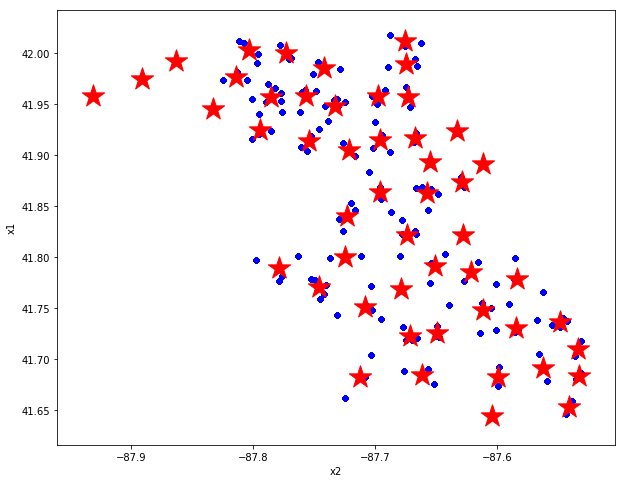

In [23]:
ax = combo.plot(    
    kind="scatter", 
    y='Latitude', x='Longitude',
    figsize=(10,8),
    c = 'b'
)

centroids.plot(
    kind="scatter", 
    y="x1", x="x2", 
    marker="*", c='r', s=550,
    ax=ax
)

In [24]:
combo['cluster'] = kmeans.labels_

In [25]:
len(X_k_train)

8475

In [26]:
X_k_train['cluster'] = combo['cluster'][0:8475]

In [27]:
X_k_test['cluster'] = combo['cluster'][8475:]

In [28]:
len(set(X_k_test['cluster']))        # Are all clusters accounted for in our training data set?

50

In [29]:
X_k_train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,cluster
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,16
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,16
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,30
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,24
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,24


In [30]:
X_k_train.to_csv('../data/train_with_cluster.csv')

In [31]:
X_k_test.to_csv('../data/test_with_cluster.csv')

In [36]:
X = X_k_train[['Date', 'Species', 'cluster', 'NumMosquitos']].copy()
X['week'] = X['Date'].dt.strftime('%W')
y = X[['NumMosquitos']]

In [37]:
X.drop(['Date','NumMosquitos'], axis = 1, inplace=True)

In [40]:
X = pd.get_dummies(X, columns = ['Species','cluster'])

In [74]:
X['Species_UNSPECIFIED CULEX'] = 0

In [71]:
Test = X_k_test[['Date','Species', 'cluster']].copy()
Test['week'] = Test['Date'].dt.strftime('%W')
Test.drop(['Date'], axis = 1, inplace = True)

In [72]:
Test=pd.get_dummies(Test, columns = ['Species','cluster'])

In [73]:
Test.columns

Index(['week', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Species_UNSPECIFIED CULEX', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10',
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15',
       'cluster_16', 'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20',
       'cluster_21', 'cluster_22', 'cluster_23', 'cluster_24', 'cluster_25',
       'cluster_26', 'cluster_27', 'cluster_28', 'cluster_29', 'cluster_30',
       'cluster_31', 'cluster_32', 'cluster_33', 'cluster_34', 'cluster_35',
       'cluster_36', 'cluster_37', 'cluster_38', 'cluster_39', 'cluster_40',
       'cluster_41', 'cluster_42', 'cluster_43', 'cluster_44', 'cluster_45',
       'cluster_46', 'cluster_47', 'cluster_4

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1929)

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for i in range(2,40):
    knn = KNeighborsRegressor(n_neighbors = i)
    model = knn.fit(X_train, y_train)
    yhat = model.predict(X_test)
    print('i = ', i)
    print(r2_score(y_train, knn.predict(X_train)))
    print(r2_score(y_test, yhat))
    print()


i =  2
0.08246029968637802
-0.6830207004606801

i =  3
0.14505342574817992
-0.5027143667658605

i =  4
0.29363617376881623
-0.2639502069538089

i =  5
0.3304583163457667
-0.14270599144278284

i =  6
0.33918588510087677
0.0026455219394571072

i =  7
0.333592240907287
0.01756539421923975

i =  8
0.32915999290775133
0.03550720379428163

i =  9
0.31517113322821455
0.10952530754499612

i =  10
0.3037518514213131
0.07244788770149646

i =  11
0.289315427821374
0.09736867007289651

i =  12
0.2662499339407999
0.1018867018147881

i =  13
0.2605669033468182
0.13100064763292363

i =  14
0.2594734614874946
0.16395717040388402

i =  15
0.25433445004546573
0.15549251718486823

i =  16
0.24870929261873465
0.15185699859246626

i =  17
0.24160979886042067
0.1466693895930974

i =  18
0.2319824856041217
0.14810572342815398

i =  19
0.22427329920990502
0.14747544894164077

i =  20
0.21581200762221975
0.14654237175370888

i =  21
0.20181307386061353
0.14193304753534097

i =  22
0.19633738567577275
0.1352226

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print(r2_score(y_train,lr.predict(X_train)))
print(r2_score(y_test,lr.predict(X_test)))

0.09210779753533871
-3.335258266948278e+16


In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    model = knn.fit(X_train, y_train)
    yhat = model.predict(X_test)
    print('i = ', i)
    print(r2_score(y_train, knn.predict(X_train)))
    print(r2_score(y_test, yhat))
    print()


/Users/ScottW/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


i =  2
0.14183383204749123
-0.3378407682590965

i =  3
0.06527107623509842
-0.2842810066018975

i =  4
-0.0017706310317506802
-0.015834374231206816

i =  5
-0.011063487648430348
-0.027575137579442632

i =  6
-0.01369725223499385
-0.042603550172700455

i =  7
-0.015557365075205443
-0.05258318117722238

i =  8
-0.017797426251763726
-0.04827731875363894

i =  9
-0.018614216754985646
-0.05579036535416493

i =  10
-0.018988781640090435
-0.052818688693553106

i =  11
-0.024825557421876754
-0.05480248268907073

i =  12
-0.02484841930292281
-0.055606062881157436

i =  13
-0.027852669683781972
-0.05359051105389212

i =  14
-0.027785862713961773
-0.05522693146282176

i =  15
-0.028166783391722516
-0.05759663663850878

i =  16
-0.02884958050499642
-0.058045885067388614

i =  17
-0.02879458392600709
-0.060732098071841545

i =  18
-0.029455515215292882
-0.061707491701978645

i =  19
-0.029201900115805257
-0.06330680183560755

i =  20
-0.028355275332131002
-0.05987481502944014

i =  21
-0.0283571488

In [79]:
from sklearn.linear_model import LassoCV
lr = LassoCV()
lr.fit(X_train, y_train)

print(r2_score(y_train,lr.predict(X_train)))
print(r2_score(y_test,lr.predict(X_test)))

0.09205230287423793
0.08610132657342096


/Users/ScottW/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
## For now, us KNN Regression with n = 36
## The model is terrible, but that's good enough for now.

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 36)
model = knn.fit(X_train, y_train)
yhat = model.predict(X_test)
print(r2_score(y_train, knn.predict(X_train)))
print(r2_score(y_test, yhat))
print()


0.12944739936226235
0.1243604063419419



In [82]:
yhat = knn.predict(Test)

(array([1.09917e+05, 3.38900e+03, 1.98300e+03, 2.76000e+02, 1.11000e+02,
        2.87000e+02, 1.74000e+02, 2.80000e+01, 8.00000e+01, 4.80000e+01]),
 array([  1.36111111,  33.08888889,  64.81666667,  96.54444444,
        128.27222222, 160.        , 191.72777778, 223.45555556,
        255.18333333, 286.91111111, 318.63888889]),
 <a list of 10 Patch objects>)

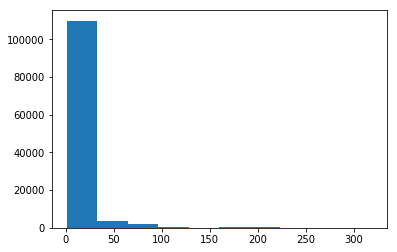

In [83]:
plt.hist(yhat)

In [84]:
X_k_test.head()

,Id,Date,Species,Trap,Latitude,Longitude,cluster
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,16
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,16
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,16
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,16
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,16


In [85]:
X_k_test['NumMosquitos'] = yhat

In [86]:
X_k_test.to_csv('../data/test_with_cluster_and_nummosquitos')